Modelling Epidemics:

To begin, let us look at one of the most basic models in epidemiology: The SIR model. The SIR model contains three parameters:

S(t) = the number of susceptible individuals in a population
I(t) = the number of infected individuals in a population
R(t) = the number of recoved individuals in a population

In order to draw up some ODEs to work with, let us make some assumptions regarding these parameters:

1. Assume that the population is closed, such that there are no births, deaths, and there is no migration. The birth and death rate can be reasonably neglected in this model because we are assuming that the disease has a far shorter lifespan than a human.

2. Assume that a recovered individual has complete immunity from the disease. In other words, only susceptible people are at risk of becoming infected.


We also note that due to the closed nature of the population, that:

$S(t) + I(t) + R(t) = 1$


Let us consider the ODE for suspectibility:

$\frac{dS}{dt} = -\beta S(t)I(t)$

This follows naturally from a number of logical observations, notably:
1. The number of susceptible people should decrease over time, thus the equation is negative.

2. We assume that the rate of change is dependent on the number of susceptible people and the number of infected people. More specifically, we anticipate that the greater the number of the infected, the more contact there is between the infected and the susceptible, and thus the greater the rate of change. Additionally, this logic of increased contact holds for the number of susceptible people too.

What then, is $\beta$? $\beta$ is clearly some measure of the contact between the infected and the susceptible. One could envision it as a measure of the number of disease transmission between these two groups; the more infective the disease is, the higher $\beta$ is.


Let us look next at the recovery equation:

$\frac{dR}{dt} = \gamma I(t)$

This is also fairly intuitive to work out: The rate of change of the number of recovered people is dependent on the number of the infected, by some factor of recovery $\gamma$. If there are more infected people, we would expect the number of recovered people per unit time to increase with it. If the recovery rate $\gamma$ is higher, then the rate of change would again be higher.

Finally, to derive the infected equation, simply note that:

$\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$


This yields:

$\frac{dI}{dt} = \beta S(t)I(t) - \gamma I(t)$


The equations in the SIR model are then as follows:

$\frac{dS}{dt} = -\beta S(t)I(t)$

$\frac{dI}{dt} = \beta S(t)I(t) - \gamma I(t)$

$\frac{dR}{dt} = \gamma I(t)$


Let us proceed by modelling these equations in Python and playing around with some of the initial conditions. Then, we can continue to think about what these values represent.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate
from matplotlib.widgets import Slider, Button, RadioButtons

In [26]:
def SIR(y, t, beta, gamma):
    S, I, R = y
    
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma*I
    dR_dt = gamma * I
    
    return [dS_dt, dI_dt, dR_dt]

<IPython.core.display.Javascript object>


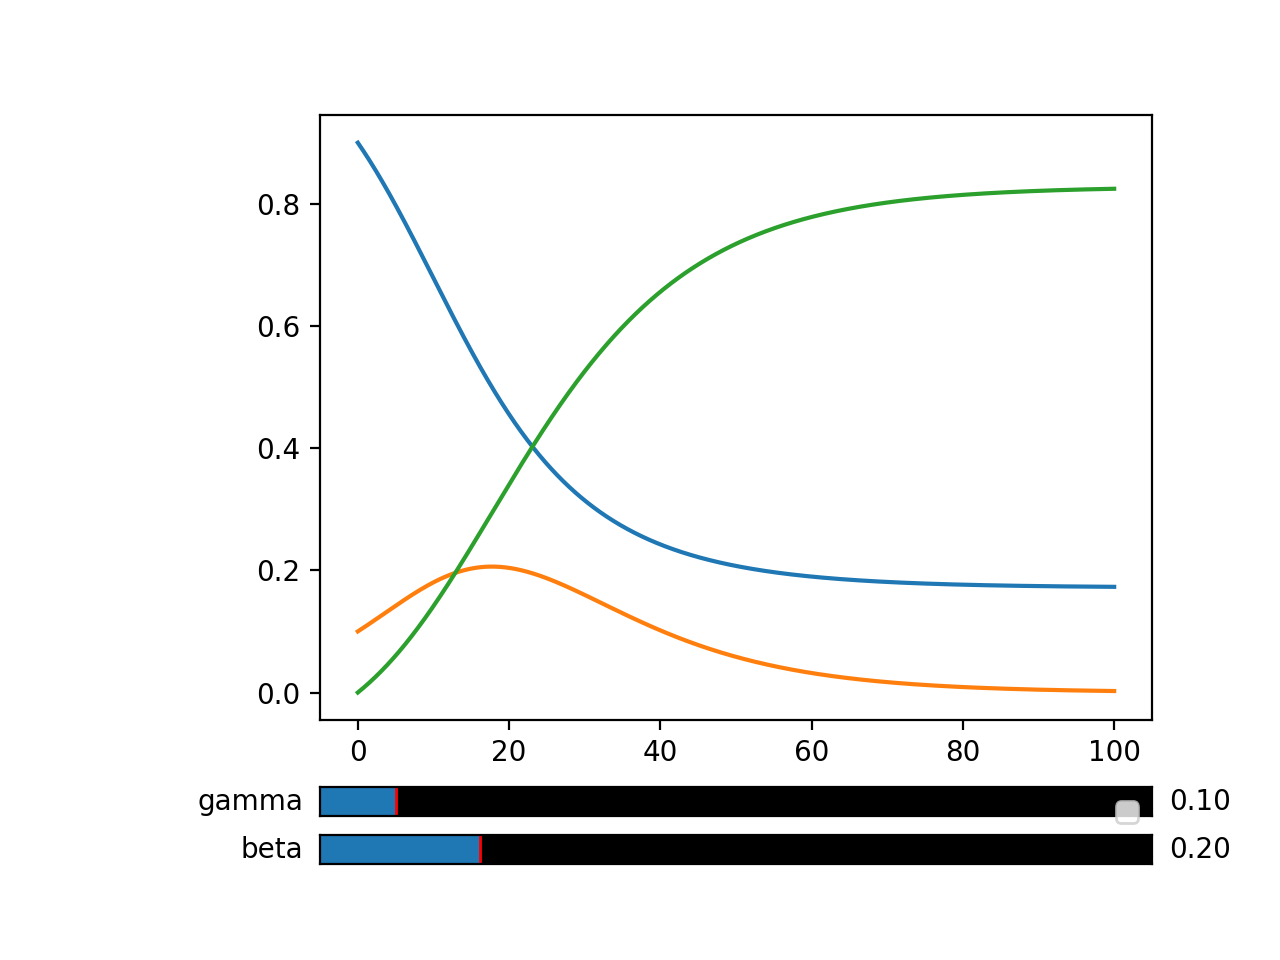

No handles with labels found to put in legend.


In [42]:
# initial conditions:
S0 = 0.9
I0 = 0.1
R0 = 0.0
beta = 0.2
gamma = 0.1

t = np.linspace(0,100,10000)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

l1, l2, l3 = plt.plot(t, integrate.odeint(SIR, [S0, I0, R0], t, args=(beta, gamma)))
#solution = np.array(solution)

axcolor = 'black'
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_g = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sa = Slider(ax_b, 'beta', 0.01, 1, valinit=beta)
sc = Slider(ax_g, 'gamma', 0.01, 1, valinit=gamma)


def update(val):
    beta = sa.val
    gamma = sc.val
    y = integrate.odeint(SIR, [S0,I0,R0], t, (beta, gamma))
    l1.set_ydata(y[:,0])
    l2.set_ydata(y[:,1])
    l3.set_ydata(y[:,2])
    fig.canvas.draw_idle()

sa.on_changed(update)
sc.on_changed(update)
plt.legend()
plt.show()

Let us continue by thinking about $\beta$ and $\gamma$, for they are highly useful in epidemiology.

Specifically, we can define a quantity $R_0$ as:

$R_0 = \frac{\beta}{\gamma}$

where $R_0$ is defined as the basic reproduction number; the average number of individuals infected from one other person. If $\beta$, the measure of how contagious the disease is, increases, then one person will infect more people, and $R_0$ increases. If $\gamma$, the measure of recovery, increases, then an infected person will recover in fewer days and will infect fewer people, and $R_0$ goes down.

For reference, here are some $R_0$ values of some infamous diseases:

Measles: $R_0$ = 12-18 (highest known $R_0$)
HIV: $R_0$ = 2-5
COVID-19: $R_0$ = 1.4-3.9 (calculated in Feb 2020)

Note that the parameters $\beta$ and $\gamma$ are fixed for a particular disease, and thus $R_0$ is specific to a disease. It has no dependence on any other factors, such as the number of people immune to the disease. As such, we assume that $R_0$ is a measure of the number of people who would be infected by one other person in a population with absolutely no herd immunity.

From $R_0$ then, we can calculate the Herd Immune Threshold as follows:

$R_0(1-p) = 1$

$p_c = 1 - \frac{1}{R_0}$

where $p_c$ is the HIT required to stop the spread of a disease.